In [4]:
library('pROC')
library('IRdisplay')
library('lme4')
library('Hmisc')
library('MLmetrics')

In [5]:
# run after Error Prediction Model - Data Preparation, where wordLevelChanges.csv is built
# Note that this notebook is in R, whereas data preparation was in Python

In [6]:
wdfs = read.csv('output/wordLevelChanges.csv', stringsAsFactors=F)
wdfs$change = sapply(wdfs$code, function(x){
    if (x == 'M'){
        return(0)
    } else { 
        return(1)
    }
})
wdfs$one =1

In [7]:
names(wdfs)

[1] "X"                                                  
  [2] "bnc_unigram_index"                                  
  [3] "bnc_unigram_prob"                                   
  [4] "bnc_unigram_word"                                   
  [5] "bnc_trigram_index"                                  
  [6] "bnc_trigram_prob"                                   
  [7] "bnc_trigram_word"                                   
  [8] "roark_scores_prefix"                                
  [9] "roark_scores_word"                                  
 [10] "roark_scores_prefix.1"                              
 [11] "roark_scores_srprsl"                                
 [12] "roark_scores_SynSp"                                 
 [13] "roark_scores_LexSp"                                 
 [14] "roark_scores_ambig"                                 
 [15] "roark_scores_open"                                  
 [16] "roark_scores_rernk"                                 
 [17] "roark_scores_toprr"                                 
 [18] "roark_scores_stps"                                  
 [19] "big_lm_scores_Unnamed..0"                           
 [20] "big_lm_scores_prob"                                 
 [21] "big_lm_scores_word"                                 
 [22] "kenlm_scores_prob"                                  
 [23] "kenlm_scores_preceding"                             
 [24] "kenlm_scores_unk"                                   
 [25] "kenlm_scores_words"                                 
 [26] "sCounter"                                           
 [27] "sentence_index"                                     
 [28] "word"                                               
 [29] "code"                                               
 [30] "conc_bigram"                                        
 [31] "conc_conc_m"                                        
 [32] "conc_conc_sd"                                       
 [33] "conc_unknown"                                       
 [34] "conc_total"                                         
 [35] "conc_percent_known"                                 
 [36] "conc_subtlex"                                       
 [37] "conc_dom_pos"                                       
 [38] "kpm_alternative_spelling"                           
 [39] "kpm_freq_pm"                                        
 [40] "kpm_dom_pos_subtlex"                                
 [41] "kpm_nletters"                                       
 [42] "kpm_nphon"                                          
 [43] "kpm_nsyll"                                          
 [44] "kpm_lemma_highest_pos"                              
 [45] "kpm_aoa_kup"                                        
 [46] "kpm_perc_known"                                     
 [47] "kpm_aoa_kup_lem"                                    
 [48] "kpm_perc_known_lem"                                 
 [49] "kpm_aoa_bird_lem"                                   
 [50] "kpm_aoa_bristol_lem"                                
 [51] "kpm_aoa_cort_lem"                                   
 [52] "kpm_aoa_schock"                                     
 [53] "pic_ipa"                                            
 [54] "pic_ipa_ss_array"                                   
 [55] "pic_ipa_ss"                                         
 [56] "pic_ipa_n"                                          
 [57] "pic_ortho"                                          
 [58] "pic_ortho_ss_array"                                 
 [59] "pic_ortho_ss"                                       
 [60] "pic_ortho_n"                                        
 [61] "pic_character"                                      
 [62] "pic_character_ss_array"                             
 [63] "pic_character_ss"                                   
 [64] "pic_character_n"                                    
 [65] "lic_mean_surprisal_weighted"                        
 [66] "lic_mean_surprisal_unweighted"                      
 [67] "lic_frequency"                     

In [8]:
# convert log probabilities to surprisals
wdfs$bnc_unigram_prob = -1 * wdfs$bnc_unigram_prob
wdfs$bnc_trigram_prob = -1 * wdfs$bnc_trigram_prob
wdfs$kenlm_scores_prob = -1 * wdfs$kenlm_scores_prob
wdfs$big_lm_scores_prob = -1 * wdfs$big_lm_scores_prob

In [9]:
wdfs[1,c('bnc_unigram_prob','bnc_trigram_prob','kenlm_scores_prob','big_lm_scores_prob')]

,bnc_unigram_prob,bnc_trigram_prob,kenlm_scores_prob,big_lm_scores_prob
,<dbl>,<dbl>,<dbl>,<dbl>
1,3.310068,2.994068,3.516777,3.202744


In [10]:
dim(wdfs)

[1] 27290   171

[ ] part of speech  
[X] number of syllables: kpm_nsyll  
[X] word length: kpm_nphon  
[X] aoa_rating: kpm_aoa_kup  
[X] concreteness: conc_conc_m  
[X] phonological neighborhood density: pld20  
[X] contextual diversity: Need Subtlexus: SUBTLCD  

random effects structure
https://www4.stat.ncsu.edu/~reich/ABA/code/DICmixed

In [11]:
wdfs

X,bnc_unigram_index,bnc_unigram_prob,bnc_unigram_word,bnc_trigram_index,bnc_trigram_prob,bnc_trigram_word,roark_scores_prefix,roark_scores_word,roark_scores_prefix.1,⋯,initial_WSJ_gt_trigramProb,initial_WSJ_gt_trigramProb_rank,initial_WSJ_gt_trigramProb_quartile,initial_WSJ_gt_5gramProb,initial_WSJ_gt_5gramProb_rank,initial_WSJ_gt_5gramProb_quartile,thread_id,chain_length,change,one
<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<int>,<dbl>,<dbl>
0,0,3.310068,each,0,2.994068,each,pfix:1,each,6.566,⋯,-25.89379,17,1,-25.89379,17,1,0_0,24,0,1
1,1,7.309903,nonfiction,1,8.412464,nonfiction,pfix:2,nonfiction,18.290,⋯,-25.89379,17,1,-25.89379,17,1,0_0,24,1,1
2,2,3.631093,book,2,3.756868,book,pfix:3,book,28.519,⋯,-25.89379,17,1,-25.89379,17,1,0_0,24,0,1
3,3,2.600407,has,3,2.253614,has,pfix:4,has,32.402,⋯,-25.89379,17,1,-25.89379,17,1,0_0,24,0,1
4,4,1.681165,a,4,1.317157,a,pfix:5,a,35.256,⋯,-25.89379,17,1,-25.89379,17,1,0_0,24,0,1
5,5,3.737589,call,5,3.763689,call,pfix:6,call,44.218,⋯,-25.89379,17,1,-25.89379,17,1,0_0,24,0,1
6,6,3.321531,number,6,3.708286,number,pfix:7,number,53.366,⋯,-25.89379,17,1,-25.89379,17,1,0_0,24,0,1
7,7,2.162270,on,7,2.029635,on,pfix:8,on,58.319,⋯,-25.89379,17,1,-25.89379,17,1,0_0,24,1,1
8,8,2.804867,its,8,2.394903,its,pfix:9,its,62.220,⋯,-25.89379,17,1,-25.89379,17,1,0_0,24,0,1


In [12]:
# interpolate missing values in the input
fixed_effects = c('one','word','bnc_unigram_prob', 'bnc_trigram_prob', 'roark_scores_SynSp', 
'roark_scores_LexSp', 'big_lm_scores_prob', 'kenlm_scores_prob','sCounter', 
'kpm_aoa_kup','kpm_nphon', 'kpm_nsyll','conc_conc_m','pld20', 'SUBTLCD', 
'normalized_biglm_probability', 'normalized_WSJ_Roark_Negative.Log.Probability',
'normalized_BNC_KNN_unigramProb', 'normalized_BNC_KNN_trigramProb',
'normalized_kenlm_probability', 'normalized_bllip_probability', 
'normalized_bllip_wsj_probability', 'normalized_mikolov_wsj_probability','pic_ipa_ss','kenlm_scores_prob')

for(fixed_effect in fixed_effects){
    print(paste(fixed_effect, 'missing', length(which(is.na(wdfs[,fixed_effect]))), 'observations'))
  wdfs[is.na(wdfs[,fixed_effect]), fixed_effect] <- mean(wdfs[,fixed_effect], na.rm = TRUE)
}

[1] "one missing 0 observations"
[1] "word missing 0 observations"


Warning message in mean.default(wdfs[, fixed_effect], na.rm = TRUE):
“argument is not numeric or logical: returning NA”


[1] "bnc_unigram_prob missing 0 observations"
[1] "bnc_trigram_prob missing 0 observations"
[1] "roark_scores_SynSp missing 0 observations"
[1] "roark_scores_LexSp missing 0 observations"
[1] "big_lm_scores_prob missing 0 observations"
[1] "kenlm_scores_prob missing 0 observations"
[1] "sCounter missing 0 observations"
[1] "kpm_aoa_kup missing 5562 observations"
[1] "kpm_nphon missing 435 observations"
[1] "kpm_nsyll missing 435 observations"
[1] "conc_conc_m missing 2457 observations"
[1] "pld20 missing 253 observations"
[1] "SUBTLCD missing 45 observations"
[1] "normalized_biglm_probability missing 0 observations"
[1] "normalized_WSJ_Roark_Negative.Log.Probability missing 0 observations"
[1] "normalized_BNC_KNN_unigramProb missing 0 observations"
[1] "normalized_BNC_KNN_trigramProb missing 0 observations"
[1] "normalized_kenlm_probability missing 0 observations"
[1] "normalized_bllip_probability missing 0 observations"
[1] "normalized_bllip_wsj_probability missing 0 observations"
[1]

# Fixed Effects Logistic Regression

In [13]:
fixed_effects

[1] "one"                                          
 [2] "word"                                         
 [3] "bnc_unigram_prob"                             
 [4] "bnc_trigram_prob"                             
 [5] "roark_scores_SynSp"                           
 [6] "roark_scores_LexSp"                           
 [7] "big_lm_scores_prob"                           
 [8] "kenlm_scores_prob"                            
 [9] "sCounter"                                     
[10] "kpm_aoa_kup"                                  
[11] "kpm_nphon"                                    
[12] "kpm_nsyll"                                    
[13] "conc_conc_m"                                  
[14] "pld20"                                        
[15] "SUBTLCD"                                      
[16] "normalized_biglm_probability"                 
[17] "normalized_WSJ_Roark_Negative.Log.Probability"
[18] "normalized_BNC_KNN_unigramProb"               
[19] "normalized_BNC_KNN_trigramProb"               
[20] "normalized_kenlm_probability"                 
[21] "normalized_bllip_probability"                 
[22] "normalized_bllip_wsj_probability"             
[23] "normalized_mikolov_wsj_probability"           
[24] "pic_ipa_ss"                                   
[25] "kenlm_scores_prob"

In [14]:
# basic fixed effects logistic regression
wdf = wdfs[,fixed_effects]
wdf$changed = as.numeric(wdfs$code != 'M')
model <- glm(changed ~ bnc_unigram_prob + bnc_trigram_prob + roark_scores_LexSp +  roark_scores_SynSp
+ big_lm_scores_prob + sCounter + kpm_aoa_kup + kpm_nphon + kpm_nsyll + conc_conc_m
,family=binomial(link='logit'),data=wdf)

In [15]:
summary(model)


Call:
glm(formula = changed ~ bnc_unigram_prob + bnc_trigram_prob + 
    roark_scores_LexSp + roark_scores_SynSp + big_lm_scores_prob + 
    sCounter + kpm_aoa_kup + kpm_nphon + kpm_nsyll + conc_conc_m, 
    family = binomial(link = "logit"), data = wdf)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5706  -0.6444  -0.5315  -0.4295   2.4168  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -2.492294   0.081356 -30.634  < 2e-16 ***
bnc_unigram_prob   -0.064418   0.032682  -1.971  0.04872 *  
bnc_trigram_prob    0.202444   0.021231   9.535  < 2e-16 ***
roark_scores_LexSp  0.029362   0.017753   1.654  0.09814 .  
roark_scores_SynSp  0.116196   0.025557   4.547 5.45e-06 ***
big_lm_scores_prob  0.216211   0.016845  12.836  < 2e-16 ***
sCounter            0.091441   0.006155  14.856  < 2e-16 ***
kpm_aoa_kup         0.058568   0.013289   4.407 1.05e-05 ***
kpm_nphon          -0.065788   0.020369  -3.230  0.00124 ** 
kpm_n

Setting levels: control = 0, case = 1

Setting direction: controls < cases



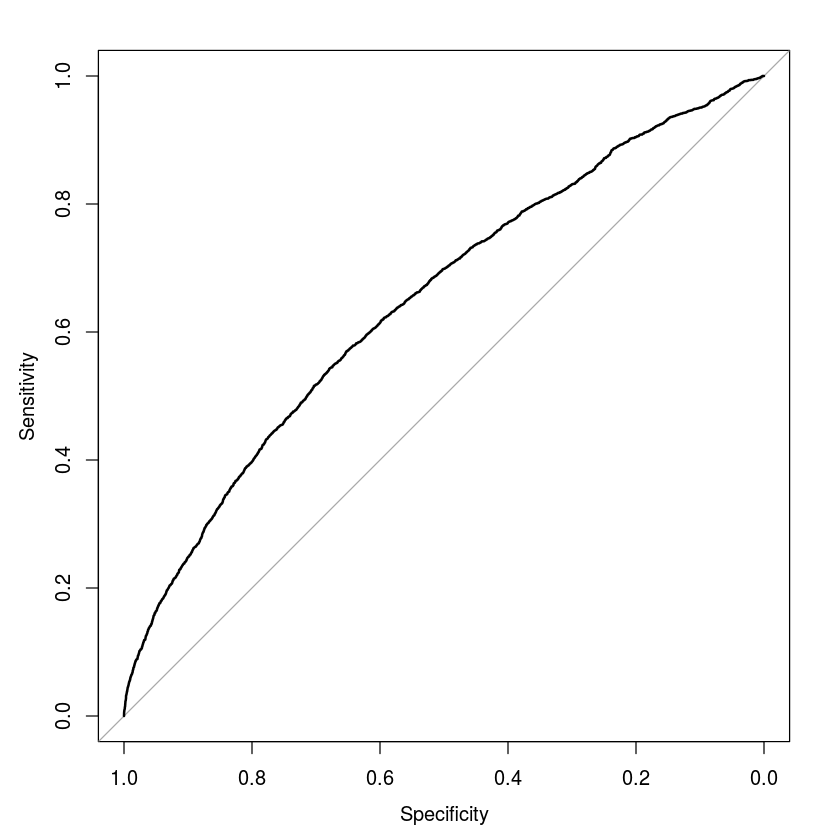

In [16]:
wdfs$predicted = predict(model, wdf, type='response')
df = data.frame(prob=wdfs$predicted, change=wdfs$change)
g <- roc(change ~prob, data = df)
plot(g)    

In [17]:
auc(g)

Area under the curve: 0.6477

In [18]:
colorizeVector = function(vector){
    colorramp = colorRampPalette(c("green", "red"))(n = 101)
    quantiles = quantile(vector, probs=seq(0,1,.01), na.rm=T)
    percentile_limits = sapply(vector, function(x){
        which.max(x <= quantiles)	
    })
    percentile = sapply(percentile_limits, function(x){ifelse(length(x) > 0, x, NA)})
    colors = colorramp[percentile]
    return(colors)
}
wdfs$color = colorizeVector(wdfs$predicted)

colorizeSentence = function(df, sentenceIndex, format = 'HTML'){
    sentence = subset(df, sentence_index == sentenceIndex)
    sentence = sentence[order(sentence$bnc_unigram_index),]
    if (format =='HTML'){
        html_pieces = paste0('<font color="',sentence$color,'">',sentence$word, '</font>')    
        return(paste(html_pieces, collapse =' '))
    } else if (format == 'latex'){
        latex_pieces = paste0('{color[HTML]{',gsub('#','',sentence$color),'}',sentence$word,'}')
        #{\color[HTML]{color}text}
        return(paste(latex_pieces, collapse =' '))
    }
}

colorizeSentence(wdfs,1661,'latex')
display_html(colorizeSentence(wdfs,1661))

[1] "{color[HTML]{38C600}a} {color[HTML]{28D600}single} {color[HTML]{FF0000}soothe} {color[HTML]{DD2100}has} {color[HTML]{F40A00}iron} {color[HTML]{C13D00}rods} {color[HTML]{778700}and} {color[HTML]{F70700}wraps}"

a single soothe has iron rods and wraps

# Mixed Effects Logistic Regression Model

In [19]:
print(names(wdf))
print(nrow(wdf))

 [1] "one"                                          
 [2] "word"                                         
 [3] "bnc_unigram_prob"                             
 [4] "bnc_trigram_prob"                             
 [5] "roark_scores_SynSp"                           
 [6] "roark_scores_LexSp"                           
 [7] "big_lm_scores_prob"                           
 [8] "kenlm_scores_prob"                            
 [9] "sCounter"                                     
[10] "kpm_aoa_kup"                                  
[11] "kpm_nphon"                                    
[12] "kpm_nsyll"                                    
[13] "conc_conc_m"                                  
[14] "pld20"                                        
[15] "SUBTLCD"                                      
[16] "normalized_biglm_probability"                 
[17] "normalized_WSJ_Roark_Negative.Log.Probability"
[18] "normalized_BNC_KNN_unigramProb"               
[19] "normalized_BNC_KNN_trigramProb"         

In [20]:
# add residuals 
wdf$resid_bnc_trigram_prob = lm(bnc_trigram_prob ~ bnc_unigram_prob, data=wdf)$residuals

for (structuredModel in c('roark_scores_SynSp','big_lm_scores_prob','kenlm_scores_prob')){
    wdf[[paste0('resid_',structuredModel)]] = lm(as.formula(paste0(structuredModel, 
        ' ~ bnc_trigram_prob + bnc_unigram_prob')), data=wdf)$residuals
}

In [21]:
wdf$subject_id = as.factor(wdfs$user)
wdf$upstream_subject_id = as.factor(wdfs$upstream_subject_id)

mixed_model <- glmer(changed ~ bnc_unigram_prob + resid_bnc_trigram_prob + resid_roark_scores_SynSp 
+ resid_big_lm_scores_prob + resid_kenlm_scores_prob + sCounter + kpm_aoa_kup + kpm_nphon + kpm_nsyll + conc_conc_m + pld20 
+ (1|subject_id) + (1|upstream_subject_id)
,family=binomial(link='logit'),data=wdf, control=glmerControl(optimizer="bobyqa",
                            optCtrl=list(maxfun=2e5)))

In [22]:
# how useful is knowing the probability of the sentence -- takes forever to run
#+ normalized_biglm_probability + normalized_WSJ_Roark_Negative.Log.Probability 
#+ normalized_BNC_KNN_unigramProb + normalized_BNC_KNN_trigramProb 
#+ normalized_kenlm_probability + normalized_bllip_probability
#+ normalized_bllip_wsj_probability + normalized_mikolov_wsj_probability        

In [23]:
summary(mixed_model)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
changed ~ bnc_unigram_prob + resid_bnc_trigram_prob + resid_roark_scores_SynSp +  
    resid_big_lm_scores_prob + resid_kenlm_scores_prob + sCounter +  
    kpm_aoa_kup + kpm_nphon + kpm_nsyll + conc_conc_m + pld20 +  
    (1 | subject_id) + (1 | upstream_subject_id)
   Data: wdf
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 2e+05))

     AIC      BIC   logLik deviance df.resid 
 23504.8  23619.8 -11738.4  23476.8    27276 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7924 -0.4763 -0.3563 -0.2505  7.2071 

Random effects:
 Groups              Name        Variance Std.Dev.
 subject_id          (Intercept) 0.38308  0.6189  
 upstream_subject_id (Intercept) 0.08795  0.2966  
Number of obs: 27290, groups:  subject_id, 261; upstream_subject_id, 258

Fixed effects:
                          Estimate Std. Error z value Pr

In [24]:
wdfs$me_predicted = predict(mixed_model, wdf, type='response')
initial_sentences = subset(wdfs, upstream_pointer ==-1 & global_chain ==0)

colHTMLStore = mat.or.vec(20,1)
for (sid in c(0:39)){
    target_index = unique(subset(initial_sentences, stimulus_id == sid)$sentence_index)
    
    if (sid <= 20){
         colHTMLStore[sid] = colorizeSentence(wdfs, target_index, format='latex')   
    }
    colorHTML = colorizeSentence(wdfs,target_index)
    display_html(colorHTML)
}

write(paste0(colHTMLStore, collapse='\n \\\\ \n'), file = "figures/logisticRegression.txt")

each nonfiction book has a call number on its spine

a dietitian goes to college for at least four years

the iris absorbs all of the light waves except blue

some acids you may know are vinegar and lemon juice

the chase leads across a field toward a nearby farm

your teeth begin breaking up the food by chewing it

the raspberry leaves are not very tasty to a rabbit

a fly buzzed over the oilcloth on the kitchen table

the brain helps all parts of the body work together

often the village was burned to the ground by fires

goods are exchanged in the market place of an oasis

you may not notice yourself growing from day to day

the discovery of oil has caused many cities to grow

they can read the label and use the medicine safely

a county may have several towns or cities within it

now the plane was going one thousand miles an hour

the molecules that make up the matter do not change

the captain closed the door behind us and bolted it

the third and fourth waves seemed to be the highest

how do you know the difference between hot and cold

meadow mice and gophers eat the roots of some weeds

stainless steel is an iron alloy that does not rust

he rides his golden chariot across the sky each day

they went on a short hike one warm autumn afternoon

the nearest patch of native grasses is not far away

failure to be informed on tax matters can be costly

someone probably will hear you if you yell for help

they may extend across the whole width of a glacier

falls are one kind of accident you can help prevent

models of atoms are much larger than the real thing

you get that energy when you eat foods from animals

now she wondered if he cared about anything she did

the two major forms of drama are tragedy and comedy

consumers look for the best buys in an open market

all experiments must test only one factor at a time

the oceans of the world provide us with many things

a contract is an agreement which is enforced by law

then she would walk slowly and smoothly to the park

they found that they had many of the same interests

he could see that they were determined to turn back

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.formula(formula = change ~ prob, data = df)

Data: prob in 22482 controls (change 0) < 4808 cases (change 1).
Area under the curve: 0.7237


Area under the curve: 0.7237

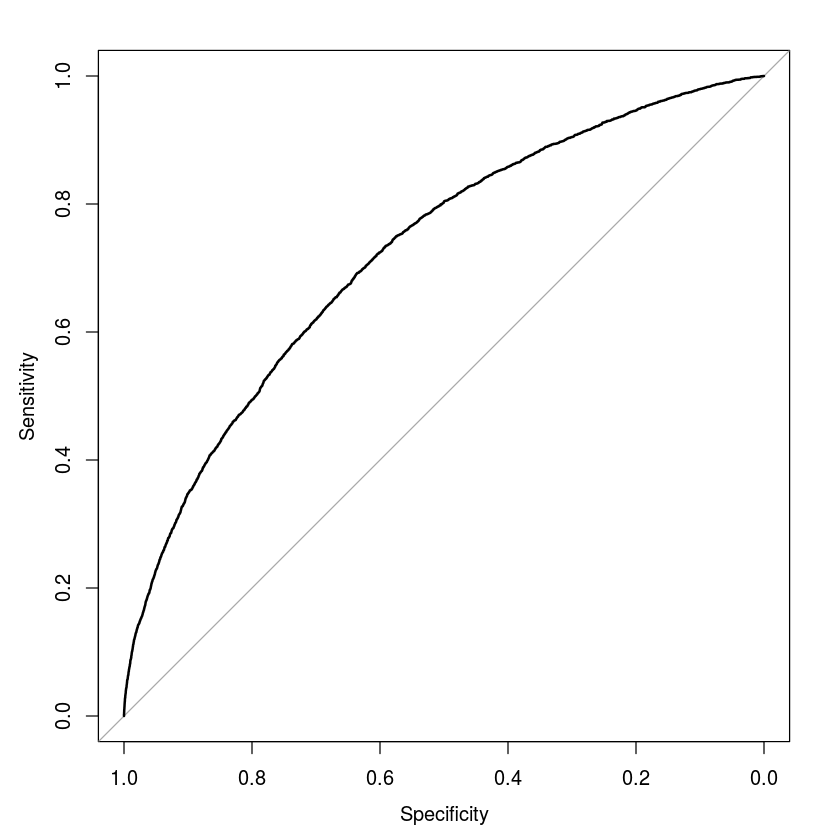

In [25]:
wdfs$me_predicted = predict(mixed_model, wdf, type='response')
df = data.frame(prob=wdfs$me_predicted, change=wdfs$change)
g <- roc(change ~prob, data = df)
print(plot(g))
auc(g)

In [26]:
mixed_model_nolms <- glmer(changed ~ sCounter + kpm_aoa_kup + kpm_nphon + kpm_nsyll + conc_conc_m + pld20 
+ (1|subject_id) + (1|upstream_subject_id)
,family=binomial(link='logit'),data=wdf, control=glmerControl(optimizer="bobyqa",
                            optCtrl=list(maxfun=2e5)))

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.formula(formula = change ~ prob, data = df)

Data: prob in 22482 controls (change 0) < 4808 cases (change 1).
Area under the curve: 0.6876


Area under the curve: 0.6876

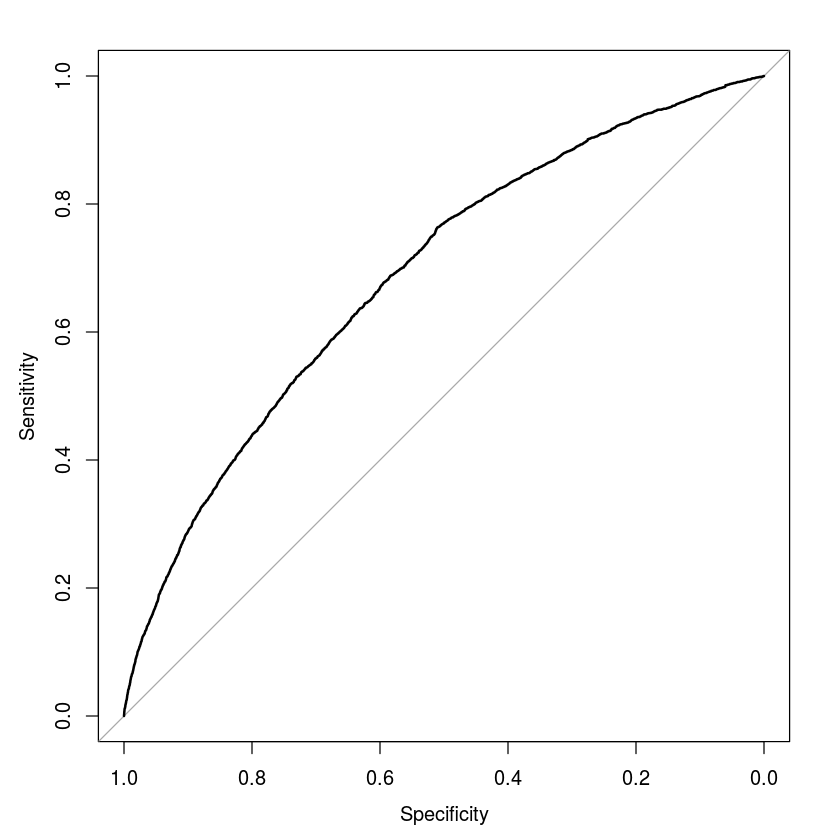

In [27]:
wdfs$nolms_predicted = predict(mixed_model_nolms, wdf, type='response')
df = data.frame(prob=wdfs$nolms_predicted, change=wdfs$change)
g <- roc(change ~prob, data = df)
print(plot(g))
auc(g)

In [28]:
# output the graph
source('telephone_analysis.R')

replacements = list()
replacements[['bnc_unigram_prob']] = 'BNC unigram surprisal'
replacements[['resid_bnc_trigram_prob']] = 'Residualized BNC trigram surprisal'
replacements[['resid_roark_scores_SynSp']] = 'Residualized Roark PCFG syntactic surprisal'
replacements[['resid_big_lm_scores_prob']] = 'Residualized Big LM surprisal'
replacements[['resid_kenlm_scores_prob']] = 'Residualized DS 5-gram surprisal'
replacements[['sCounter']] = 'Position in sentence'
replacements[['kpm_aoa_kup']] = 'Age of acquisition'
replacements[['kpm_nphon']] = 'Number of phonemes'
replacements[['kpm_nsyll']] = 'Number of syllables'
replacements[['conc_conc_m']] = 'Concreteness'
replacements[['pld20']] = 'Phonological Neighborhood Density (PLD20)'
replacements[['upstream_subject_id']] = 'Speaker ID'
replacements[['subject_id']] = 'Listener ID'

modelName = "wordLevel"
wordLevelCaption = 'Mixed-effects logistic regression predicting whether a word will be transmitted successfully on the basis of its surprisal under various language models as well as other word properties. Significance of fixed-effects is computed following \\citet{satterthwaite1946}.'
wordLevelLabel = 'tab:wordlevel_lm'

modelToTable('mixed_logistic', modelName, mixed_model, replacements=replacements,file=paste0('LMs/',modelName,'_lm.tex'), 
        printVars = T, caption = wordLevelCaption, label = wordLevelLabel, where= 't')



Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




 [1] "(Intercept)"                                
 [2] "BNC unigram surprisal"                      
 [3] "Residualized BNC trigram surprisal"         
 [4] "Residualized Roark PCFG syntactic surprisal"
 [5] "Residualized Big LM surprisal"              
 [6] "Residualized DS 5-gram surprisal"           
 [7] "Position in sentence"                       
 [8] "Age of acquisition"                         
 [9] "Number of phonemes"                         
[10] "Number of syllables"                        
[11] "Concreteness"                               
[12] "Phonological Neighborhood Density (PLD20)"  
$names
[1] "subject_id"          "upstream_subject_id"

$sc
[1] 1

$useSc
[1] FALSE

$class
[1] "VarCorr.merMod"

[1] "Alisases for random variables"
[1] "Listener ID" "Speaker ID" 


Cross-validation 

In [29]:
wdfs

X,bnc_unigram_index,bnc_unigram_prob,bnc_unigram_word,bnc_trigram_index,bnc_trigram_prob,bnc_trigram_word,roark_scores_prefix,roark_scores_word,roark_scores_prefix.1,⋯,initial_WSJ_gt_5gramProb_rank,initial_WSJ_gt_5gramProb_quartile,thread_id,chain_length,change,one,predicted,color,me_predicted,nolms_predicted
<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
0,0,3.310068,each,0,2.994068,each,pfix:1,each,6.566,⋯,17,1,0_0,24,0,1,0.1764908,#9B6300,0.14808464,0.09514674
1,1,7.309903,nonfiction,1,8.412464,nonfiction,pfix:2,nonfiction,18.290,⋯,17,1,0_0,24,1,1,0.3230687,#EF0F00,0.19935322,0.15802665
2,2,3.631093,book,2,3.756868,book,pfix:3,book,28.519,⋯,17,1,0_0,24,0,1,0.1177455,#44BA00,0.07471432,0.13196737
3,3,2.600407,has,3,2.253614,has,pfix:4,has,32.402,⋯,17,1,0_0,24,0,1,0.1267261,#56A800,0.10947019,0.13852404
4,4,1.681165,a,4,1.317157,a,pfix:5,a,35.256,⋯,17,1,0_0,24,0,1,0.1193624,#47B700,0.09531009,0.09000096
5,5,3.737589,call,5,3.763689,call,pfix:6,call,44.218,⋯,17,1,0_0,24,0,1,0.2625842,#DB2300,0.21436614,0.16461329
6,6,3.321531,number,6,3.708286,number,pfix:7,number,53.366,⋯,17,1,0_0,24,0,1,0.1748084,#996600,0.16610951,0.14049988
7,7,2.162270,on,7,2.029635,on,pfix:8,on,58.319,⋯,17,1,0_0,24,1,1,0.1809477,#A35B00,0.14187237,0.14174735
8,8,2.804867,its,8,2.394903,its,pfix:9,its,62.220,⋯,17,1,0_0,24,0,1,0.2004885,#B54900,0.17706690,0.16347174
